# Process Critical lines

In [1]:
%load_ext autoreload
%autoreload 2
%run ~/FKMC/notebooks/notebook_preamble.py
%matplotlib inline
np.seterr(under = 'ignore')
from time import time
from munch import munchify

from matplotlib.colors import to_rgba
colors = list(map(to_rgba, """
#55115c
#821760
#ab275e
#cd4158
#e7624f
#f88646
#ffad40
#ffd547
""".strip().split('\n'))) #https://learnui.design/tools/data-color-picker.html#palette

Imported pathlib::Path, os, munch::Munch, pickle, logging, itertools::count, matplotlib::colors
Names are pyplot = plt, matplotlib = mpl, numpy = np


In [2]:
import numpy as np
from time import time
from operator import mul
from functools import reduce
from itertools import count
from munch import Munch
from itertools import zip_longest
import logging
import multiprocessing as mp

import re
from pathlib import Path

import scipy
from FKMC.general import index_histogram_array, sort_IPRs, smooth, shapes, normalise_IPR
from FKMC.import_funcs import shape_hints, timefmt

from FKMC.import_funcs import  mean_over_MCMC, IPRandDOS, extract, get_data_funcmap_chain_ext

## cdw_TJ_critical_line.ipynb data
This data is a diagonal stripe on the TJ plot

### Import the data

In [3]:
%%time
from FKMC.import_funcs import incremental_load

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
]
cdw_TJ = incremental_load(folder = '~/HPC_data/cdw_TJ_critical_line', functions = functions, force_reload = True)

INFO:FKMC.import_funcs:looking in /rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line
DEBUG:FKMC.import_funcs:structure_names = ['Rs', 'Js', 'Ts']
DEBUG:FKMC.import_funcs:structure_dims = (5, 10, 10)


[PosixPath('/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/code/cdw_TJ_critical_line.py')]
Ham_params:  t=1, alpha=1.25, mu=0, beta=varying, J=varying, U=5, normalise=True,


Tasks per chain: 5,

Each doing 1000 steps,

5000 total chain length,

500 samples,


MCMC_params:  N_steps=1000, N_burn_in=1000, thin=10, proposal=<function p_multi_site_uniform_reflect at 0x2ba22cc1fa70>, accept_function=<function perturbation_accept at 0x2ba22cc1fdd0>, warnings=False,


DEBUG:FKMC.import_funcs:Missing jobs, should all be up to 29
DEBUG:FKMC.import_funcs:task_id: chain_ids
DEBUG:FKMC.import_funcs:217: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
INFO:FKMC.import_funcs:Expected number of tasks 500
INFO:FKMC.import_funcs:Measured number of tasks 455
INFO:FKMC.import_funcs:Expected number of chains None
INFO:FKMC.import_funcs:Shortest Chain 20
INFO:FKMC.import_funcs:Longest Chain 30
INFO:FKMC.import_funcs:Using chain length 30
INFO:FKMC.import_funcs:Logger keys: ['Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'logs', 'allow_pickle', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['N_steps', 'N_burn_in', 'thin', 'proposal', 'accept_function', 'warnings', 'state', 'logger'] 

INFO:FKMC.import_funcs:Overall steps = 3000
DEBUG:FKMC.import_funcs:[(0, 'Rs', 5), (1, 'Js', 10), (2, 'Ts', 10)]
DEBUG:FKMC.import_funcs:available observables = ['A', 'Fc', 'Ff', 'IPRs', 'Mf_moments', '

0 1 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/2_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/2_15.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/2_10.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/2_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/2_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/2_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/2_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/2_14.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/

2 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/3_22.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/3_24.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/3_27.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/3_26.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/3_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/3_25.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/3_28.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/3_29.npz is expected but missing!
DEBUG:FKMC.import_funcs:

3 4 5 6 7 8 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/10_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/10_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/10_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/10_14.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/10_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/10_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/10_17.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/10_18.npz is expected but missing!
DEBUG:FKMC.import_fun

9 10 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/11_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/11_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/11_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/11_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/11_8.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/11_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/11_11.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/11_16.npz is expected but missing!
DEBUG:FKMC.import_func

11 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/12_27.npz is expected but missing!


12 13 14 15 16 17 18 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/20_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/20_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/20_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/20_11.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/20_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/20_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/20_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/20_3.npz is expected but missing!
DEBUG:FKMC.import_funcs

19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_21.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_6.npz is expected but missing!
DEBUG:FKMC.impo

99 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_29.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_18.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_8.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_27.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_16.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_13.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_15.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/100_22.npz is expected but missing!
DEBUG:FKM

100 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/101_15.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/101_21.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/101_24.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/101_22.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/101_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/101_19.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/101_16.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/101_28.npz is expected but missing!
DEBUG:FK

101 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_5.npz is expected but missing!
DEBUG:FKMC.impor

102 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_18.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_17.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_19.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_22.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_20.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_21.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/103_28.npz is expected but missing!
DEBUG:FK

103 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/104_27.npz is expected but missing!


104 105 106 107 108 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/110_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/110_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/110_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/110_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/110_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/110_18.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/110_20.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/110_6.npz is expected but missing!
DEBUG:FKMC.imp

109 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_15.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_18.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_12.npz is expected but missing!
DEBUG:FKMC.im

110 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_16.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_10.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_26.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_25.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_22.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_27.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/111_28.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/112_1.npz is expected but missing!
DEBUG:FKM

111 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/112_10.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/112_20.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/112_21.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/112_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/112_22.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/112_26.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/112_27.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/112_28.npz is expected but missing!
DEBUG:FK

112 113 114 115 116 117 118 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/120_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/120_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/120_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/120_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/120_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/120_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/120_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/120_8.npz is expected but missing!
DEBUG:FKMC.impor

119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_18.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_12.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_10.npz is expected but missing!
DEBUG:FKMC.im

199 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_21.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_28.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_16.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_13.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_15.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_20.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_22.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/200_27.npz is expected but missing!
DEBUG:FK

200 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/201_20.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/201_18.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/201_25.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/201_27.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/201_28.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/201_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/201_11.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/201_13.npz is expected but missing!
DEBUG:FK

201 202 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/202_26.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/202_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/202_21.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/202_25.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/202_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/203_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/202_29.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/203_0.npz is expected but missing!
DEBUG:FKMC.

203 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/204_26.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/204_25.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/204_28.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/204_21.npz is expected but missing!


204 205 206 207 208 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/210_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/210_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/210_12.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/210_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/210_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/210_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/210_8.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/210_15.npz is expected but missing!
DEBUG:FKMC.imp

209 210 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/210_25.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/211_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/211_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/211_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/211_13.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/211_17.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/211_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/211_6.npz is expected but missing!
DEBUG:FKMC.im

211 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/212_8.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/212_27.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/212_24.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/212_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/212_29.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/212_25.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/212_20.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/212_26.npz is expected but missing!
DEBUG:FKM

212 213 214 215 216 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/217_21.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/217_20.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/217_22.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/217_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/217_24.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/217_26.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/217_25.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/217_27.npz is expected but missing!
DEBUG:FK

217 217 218 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/220_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/220_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/220_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/220_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/220_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/220_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/220_11.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/220_12.npz is expected but missing!
DEBUG:FKMC.imp

219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/300_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/300_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/300_11.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/300_8.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/300_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/300_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/300_13.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/300_21.npz is expected but missing!
DEBUG:FKMC.im

299 300 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/301_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/301_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/301_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/301_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/301_12.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/301_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/301_21.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/301_8.npz is expected but missing!
DEBUG:FKMC.imp

301 302 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/303_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/303_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/303_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/303_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/303_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/303_10.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/303_11.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/303_17.npz is expected but missing!
DEBUG:FKMC.im

303 304 305 306 307 308 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/310_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/310_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/310_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/310_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/310_12.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/310_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/310_22.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/310_4.npz is expected but missing!
DEBUG:FKMC.imp

309 310 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/311_16.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/311_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/311_21.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/311_20.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/311_24.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/311_27.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/311_28.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/311_15.npz is expected but missing!
DEBUG:FK

311 312 313 314 315 316 317 318 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/320_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/320_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/320_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/320_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/320_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/320_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/320_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/320_11.npz is expected but missing!
DEBUG:FKMC.impo

319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_12.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_15.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_1.npz is expected but missing!
DEBUG:FKMC.imp

399 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_22.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_26.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/400_29.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/401_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/401_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/401_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/401_10.npz is expected but missing!
DEBUG:FKMC.

400 401 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/402_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/402_11.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/402_14.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/402_20.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/402_12.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/402_23.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/402_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/402_24.npz is expected but missing!
DEBUG:FKMC

402 403 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/404_18.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/404_3.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/404_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/404_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/404_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/404_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/404_10.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/404_8.npz is expected but missing!
DEBUG:FKMC.imp

404 405 406 407 408 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/410_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/410_15.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/410_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/410_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/410_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/410_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/410_8.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/410_5.npz is expected but missing!
DEBUG:FKMC.impo

409 410 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/411_4.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/411_8.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/411_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/411_16.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/411_9.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/411_13.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/411_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/411_0.npz is expected but missing!
DEBUG:FKMC.imp

411 412 413 414 415 416 417 418 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/420_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/420_1.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/420_2.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/420_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/420_12.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/420_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/420_8.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/data/420_3.npz is expected but missing!
DEBUG:FKMC.impo

419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['functions', 'flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'chains', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Js', 'Ts', 'Mf_moments', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 30 chains of 1000 for 30000 with thinning = 10 for 3000 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 5, 'Js': 10, 'Ts': 10}
    Ns = [250 160 110]
    Runtimes: 
        Average: 16.0 hours
        Min: 1.0 hours
        Max: 3.0 days
        Total: 45.0 weeks
    


CPU times: user 26.9 s, sys: 11.6 s, total: 38.5 s
Wall time: 9min 24s


In [4]:
cdw_TJ.hints.Mf_moments

('Ns', 'Rs', 'Js', 'Ts', 'nth moment')

/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


(10, 10), (10, 10), (3, 10, 10)


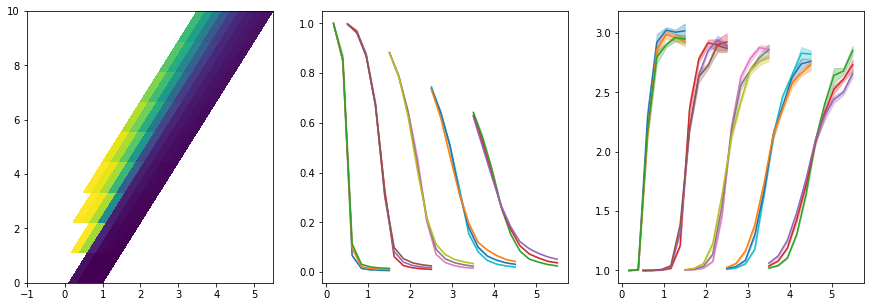

In [5]:
from scipy.stats import sem

d = cdw_TJ

#mean before
M2 = np.nanmean(d.Mf_moments[:, :, :, :, 2], axis = 1)
M4 = np.nanmean(d.Mf_moments[:, :, :, :, 4], axis = 1)
dM2 = sem(d.Mf_moments[:, :, :, :, 2], axis = 1)
dM4 = sem(d.Mf_moments[:, :, :, :, 4], axis = 1)

B = M4 / M2**2
dB = B * np.sqrt((2*dM2/M2)**2 + (dM4 / M4)**2)


#mean after
fM2 = d.Mf_moments[:, :, :, :, 2]
fM4 = d.Mf_moments[:, :, :, :, 4]

B = np.nanmean(fM4 / fM2**2, axis = 1)
dB = sem(fM4 / fM2**2, axis = 1)
M2 = np.nanmean(fM2, axis = 1)
dM2 = sem(fM2, axis = 1)

n = 3
f, ax = plt.subplots(1,n, figsize = (n*5, 5), squeeze = False)

Js = cdw_TJ.Js[:, None] * np.ones_like(cdw_TJ.Ts)[None, :]
Ts = 2.25 * Js / 5 +  cdw_TJ.Ts[None, :]

shapes(Js, Ts, B)
ax[0, 0].pcolormesh(Ts, Js, M2[-1]) 

from FKMC.plotting import spread

J_i = 5

for J_i in range(1,10,2):
    for i, N in zip(count(), cdw_TJ.Ns):
        spread(ax[0,1], Ts[J_i], M2[i, J_i, :], dM2[i, J_i, :])
        spread(ax[0,2], Ts[J_i], B[i, J_i, :], dB[i, J_i, :])


## cdw_TU_critical_line.ipynb data
This data is a vertical stripe on the TU plot

### Import the data

In [6]:
%%time
from FKMC.import_funcs import incremental_load

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
]
cdw_TU = incremental_load(folder = '~/HPC_data/cdw_TU_critical_line', functions = functions, force_reload = False)

DEBUG:FKMC.import_funcs:todo: []
INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['functions', 'flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Us', 'Ts', 'Mf_moments', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 5 chains of 1000 for 5000 with thinning = 10 for 500 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 5, 'Us': 10, 'Ts': 10}
    Ns = [250 160 110]
    Runtimes: 
        Average: 2.0 hours
        Min: 16.0 minutes
        Max: 16.0 hours
        Total: 8.0 weeks
    
    


CPU times: user 629 ms, sys: 1.31 s, total: 1.94 s
Wall time: 4.7 s


(10, 10), (10,), (3, 10, 10)


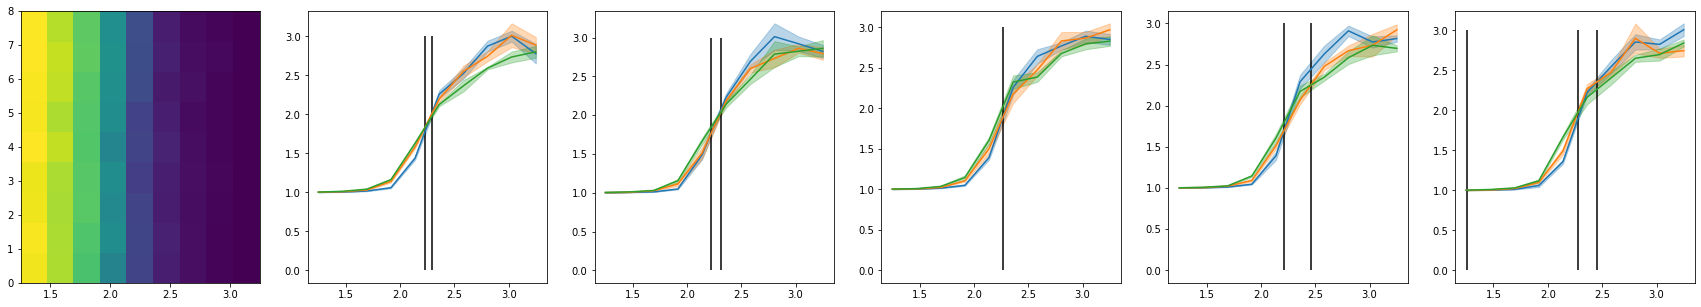

In [7]:
from scipy.stats import sem

d = cdw_TU

#mean before
M2 = np.nanmean(d.Mf_moments[:, :, :, :, 2], axis = 1)
M4 = np.nanmean(d.Mf_moments[:, :, :, :, 4], axis = 1)
dM2 = sem(d.Mf_moments[:, :, :, :, 2], axis = 1)
dM4 = sem(d.Mf_moments[:, :, :, :, 4], axis = 1)

B = M4 / M2**2
dB = B * np.sqrt((2*dM2/M2)**2 + (dM4 / M4)**2)


#mean after, I think this makes more sense, these are independant estimates of B after all
M2 = d.Mf_moments[:, :, :, :, 2]
M4 = d.Mf_moments[:, :, :, :, 4]
B = np.nanmean(M4 / M2**2, axis = 1)
dB = sem(M4 / M2**2, axis = 1)
M2 = np.nanmean(M2, axis = 1)

n = 6
f, ax = plt.subplots(1,n, figsize = (n*5, 5), squeeze = False)

Us = d.Us
Ts = d.Ts

shapes(Js, Ts, B)
ax[0, 0].pcolormesh(Ts, Us, M2[-1]) 

from FKMC.plotting import spread

U_i = 5

from FKMC.general import find_zero_crossings, interp_x_position

for U_i, ax in zip(range(1,10,2), ax[0,1:]):
    for i,j in ((0,1),(1,2)):
        f = B[j, U_i, :] - B[i, U_i, :]
        k = find_zero_crossings(f)
        Tc = interp_x_position(f,Ts,k)
        ax.vlines(Tc[Tc < 2.5], 0, 3)
    
    for i, N in zip(count(), d.Ns):
        spread(ax, Ts, B[i, U_i, :], dB[i, U_i, :])

1.4+/-0.7
2.23+/-0.06
2.27+/-0.11
2.31+/-0.07
2.30+/-0.07
2.50+/-0.10
2.05+/-0.21
2.46+/-0.07
1.4+/-0.8
2.28+/-0.07


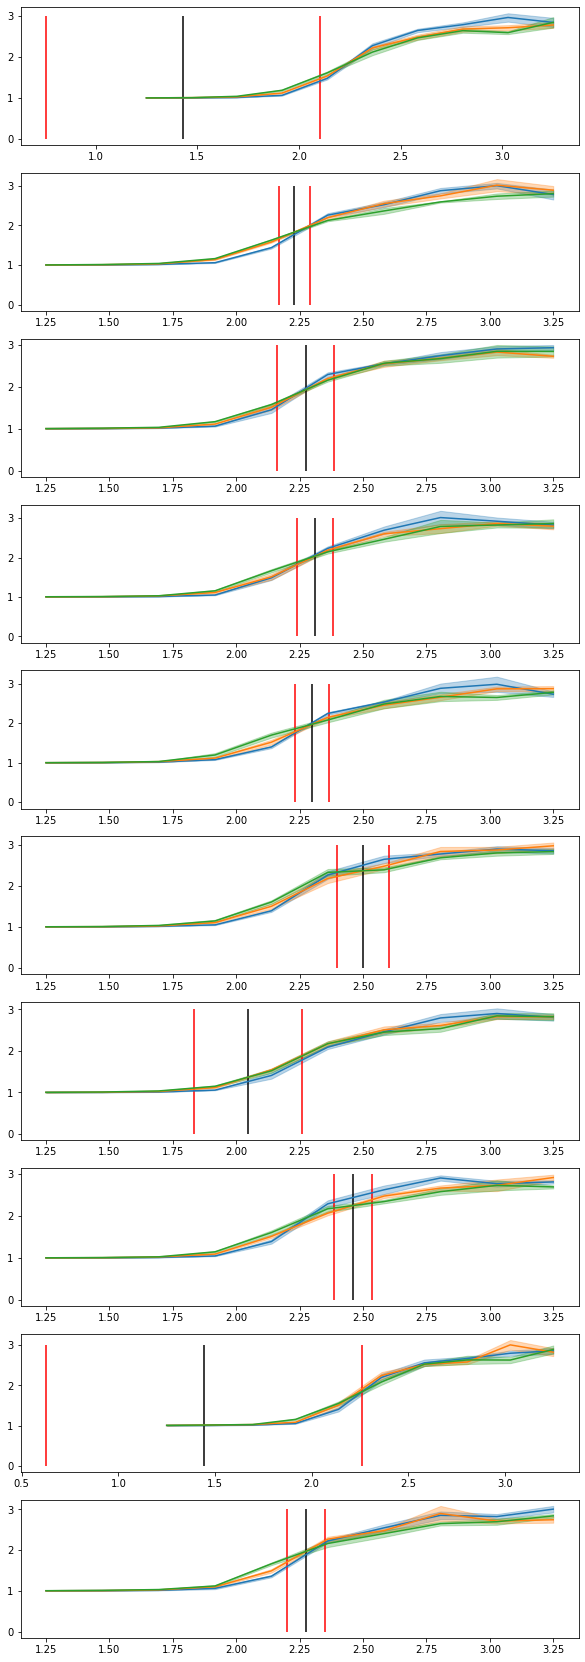

In [8]:
n = 10
f, axes = plt.subplots(n,1, figsize = (10, n*3))
from FKMC.general import find_zero_crossings, interp_x_position
from uncertainties import unumpy as unp

for U_i, ax in zip(range(0,10), axes):
    for i,j in (
        #(0,1), 
        (1,2),
        ):
        
        f = B[j, U_i, :] - B[i, U_i, :]
        df = dB[j, U_i, :] + dB[i, U_i, :]
        k = find_zero_crossings(f)
        
        f = unp.uarray(f, df)
        Tc = interp_x_position(f,Ts,k)[0]
        print(Tc)
        ax.vlines(Tc.nominal_value, 0, 3)
        ax.vlines([Tc.nominal_value+Tc.std_dev, Tc.nominal_value-Tc.std_dev], 0, 3, color = 'r')
    
    for i, N in zip(count(), d.Ns):
        spread(ax, Ts, B[i, U_i, :], dB[i, U_i, :])

## gap_gapped_TU_critical_line.ipynb data
This data is a horixontal stripe on the TU plot

### Import the data

In [9]:
%%time
from FKMC.import_funcs import incremental_load

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
    IPRandDOS(),
]
gap_TU = incremental_load(folder = '~/HPC_data/gap_gapped_TU_critical_line', functions = functions, force_reload = False)

EOFError: Ran out of input

In [10]:
def spline_interpolate(Us, Ts, Y, newgrid):
    from scipy.interpolate import RectBivariateSpline
    o = Munch(
        gridUs = newgrid[0],
        gridTs = newgrid[1],
        Us = newgrid[0, :, 0],
        Ts = newgrid[1, 0, :],
    )
    o.Y = RectBivariateSpline(Us, Ts, Y, kx = 3, ky = 3, s = 0.00001)(o.Us, o.Ts, grid = True)
    return o
    
def linear_interpolate(Us, Ts, Y, newgrid):
    from scipy.interpolate import RegularGridInterpolator
    o = Munch(
        gridUs = newgrid[0],
        gridTs = newgrid[1],
        Us = newgrid[0, :, 0],
        Ts = newgrid[1, 0, :],
    )
    
    positions = np.vstack([o.gridUs.ravel(), o.gridTs.ravel()]).T
    o.Y = RegularGridInterpolator((Us, Ts), Y)(positions).reshape([o.Us.size, o.Ts.size])
    return o

d = gap_TU
Ui = 10
Ti = 5

e = 0.01
ix = (-e < d.E_bins[:-1] ) & (d.E_bins[:-1] < e)

DOS = d.DOS[-1, :, :, :, :].mean(axis = 0)
normalisation = DOS.sum(axis = -1)[0, 0]
print(normalisation)
percent_low_E_states = DOS[:, :, ix].sum(axis = -1) / normalisation

single = np.nanmean(d.DOS[-1, :, Ui, Ti, :], axis = 0)

f, ax = plt.subplots(1,6, figsize = (30, 5), gridspec_kw = dict())


ax[0].pcolormesh(d.Ts, d.Us, percent_low_E_states, linewidth=0, rasterized = True)

threshold = 0.001 / 100
newgrid = np.mgrid[3.7:4.5:300j, 3:5:300j]
interpolated = linear_interpolate(d.Us, d.Ts, percent_low_E_states, newgrid)


from FKMC.general import get_nearby_index
T = 4
T, i = get_nearby_index(d.Ts, T)
ax[4].plot(d.Us, percent_low_E_states[:, i])

T, i = get_nearby_index(interpolated.Ts, T)
ax[4].plot(interpolated.Us, interpolated.Y[:, i])

ax[1].pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True)



ax[0].plot([d.Us[Ui],], [d.Ts[Ti],], marker = 'o', color = 'k')
ax[1].plot([d.Us[Ui],], [d.Ts[Ti],], marker = 'o', color = 'k')
ax[2].plot([d.Us[Ui],], [d.Ts[Ti],], marker = 'o', color = 'k')

threshold = 0.000005
ax[4].plot((3.5, 4.5), (threshold, threshold), '--')

ax[2].pcolormesh(d.Ts, d.Us, (percent_low_E_states > 0), linewidth=0, rasterized = True)
ax[3].pcolormesh(interpolated.Ts, interpolated.Us, (interpolated.Y > threshold), linewidth=0, rasterized = True)

single[~ix] = np.NaN

ax[5].plot(d.E_bins[:-1], single)

percent_low_E_states = DOS[:, :, ix].sum(axis = -1) / normalisation
print(percent_low_E_states[Ui, Ti])

NameError: name 'gap_TU' is not defined

In [ ]:
f, (ax, ax2, ax3, ax4) = plt.subplots(1,3, figsize = (15, 5), gridspec_kw = dict())
pcol = ax.pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True)
pcol = ax2.pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True)
pcol = ax3.pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True)

edgeUs = []

def extract_edge(U, T, Y):
    #uses the fact that argmax returns the position of the first "True" value
    #uses [:, ::-1] because we want the last along the U axis
    #but that gives us it measured from the end, so use it as a negative index
    edge = -np.argmax((Y == 1)[:, ::-1], axis = 1)
    nonzero = (edge != 0)
    edgeU = U[edge[nonzero]]
    edgeT = T[nonzero]
    
    return edgeU, edgeT

for i in d.Rs:

    #the width of the energy bin to use
    e = 0.01
    #the indices of that energy bin into the data
    ix = (-e < d.E_bins[:-1] ) & (d.E_bins[:-1] < e)

    DOS = d.DOS[-1, i, :, :, :]

    #the observed number of states
    normalisation = DOS.sum(axis = -1)[0, 0]
    print(normalisation)

    #the percentage of states near 0
    percent_low_E_states = DOS[:, :, ix].sum(axis = -1) / normalisation
    
    threshold = 0.00001 / 100
    newgrid = np.mgrid[3.7:4.5:300j, 3:5:300j]
    
    interpolated = linear_interpolate(d.Us, d.Ts, percent_low_E_states, newgrid)
    #interpolated = spline_interpolate(d.Us, d.Ts, percent_low_E_states, newgrid)
    
    #do it without any interpolation
    #edgeU, edgeT = extract_edge(d.Us, d.Ts, (percent_low_E_states.T > 0) & (M2 < 0.7))
    
    edgeU, edgeT = extract_edge(interpolated.Us, interpolated.Ts, interpolated.Y.T > threshold)
    
    #pcol = ax.pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True, alpha = 1)
    ax.plot(edgeT, edgeU, alpha = 1)
    edgeUs.append(edgeU)
    
edgeUs = np.array(edgeUs)
spread(ax2, edgeT, edgeUs.mean(axis = 0), dY = sem(edgeUs, axis = 0), alpha = 1, color = 'k')

edgeUs = np.array(edgeUs)
ax3.errorbar(edgeT[9::10], edgeUs.mean(axis = 0)[9::10], yerr = sem(edgeUs, axis = 0)[9::10], alpha = 1, color = 'k')

#edgeUs = np.array(edgeUs)
#spread(ax3, edgeT, edgeUs.mean()*np.ones_like(edgeT), dY = sem(edgeUs, axis = 0).max(), alpha = 1, color = 'k')

    
data_location = Path('~/HPC_data/pickled_data').expanduser()
with open( data_location / 'TU_phase_gap_gapless_line.pickle', 'wb') as file: 
    line = dict(
        energy_interval = e,
        DOS = DOS,
        M2 = M2,
        percent_low_E_states = percent_low_E_states,
        U = edgeUs.mean(axis = 0),
        T = edgeT,
        dU = sem(edgeUs, axis = 0),
        )
    pickle.dump(line, file)